In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Create a KNN model

In [2]:
X = pd.read_csv("Resources/clean_churn_db.csv", low_memory=False)
X.head()

,Unnamed: 0,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,2,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,3,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,4,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
y = pd.read_csv("Resources/BankChurners.csv", low_memory=False)
y.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
y = pd.get_dummies(y["Attrition_Flag"].values).iloc[:,1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.874
k: 3, Train/Test Score: 0.926/0.884
k: 5, Train/Test Score: 0.906/0.890
k: 7, Train/Test Score: 0.893/0.881
k: 9, Train/Test Score: 0.886/0.878
k: 11, Train/Test Score: 0.880/0.873
k: 13, Train/Test Score: 0.876/0.870
k: 15, Train/Test Score: 0.872/0.869
k: 17, Train/Test Score: 0.869/0.866
k: 19, Train/Test Score: 0.867/0.864


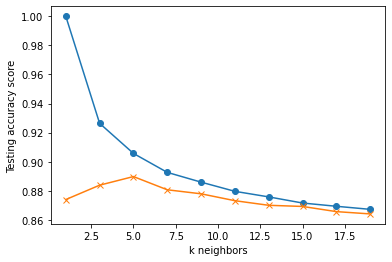

In [8]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [9]:
plot = pd.DataFrame({"x":list(range(1, 20, 2)),"y1":train_scores, "y2":test_scores})
plot.to_csv('Outputs/KNN.csv')

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.890


In [11]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [12]:
confusion_matrix(y_true, y_pred)

array([[ 143,  262],
       [  17, 2110]], dtype=int64)

In [13]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.35      0.51       405
           1       0.89      0.99      0.94      2127

    accuracy                           0.89      2532
   macro avg       0.89      0.67      0.72      2532
weighted avg       0.89      0.89      0.87      2532



In [14]:
knn.predict(X_test_scaled[0:10])

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=uint8)

In [15]:
knn.predict_proba(X_test_scaled[0:10])

array([[0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6]])

In [16]:
knn.predict_proba(X_test_scaled[0:10])[:,1]

array([1. , 1. , 0.8, 1. , 0.2, 0.6, 0.4, 1. , 1. , 0.6])

## KNN ROC curve

In [17]:
## Import the roc_curve module from scikit-learn
from sklearn.metrics import roc_curve

In [18]:
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

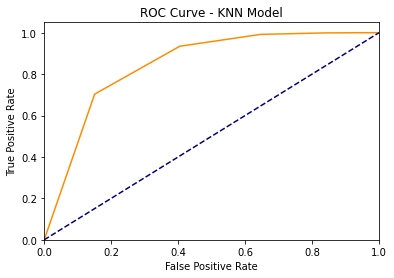

In [19]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

In [23]:
plot = pd.DataFrame({"x":1,"y1":y_pred_proba_knn, "y2":y_test})
plot.to_csv('Outputs/KNN_ROC.csv')

## Compute AUC

In [20]:
# Import the auc module from scikit-learn
from sklearn.metrics import auc

In [21]:
# Compute the AUC for the KNN model
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the KNN Model: {roc_auc_knn}")

AUC for the KNN Model: 0.8465374636507688
